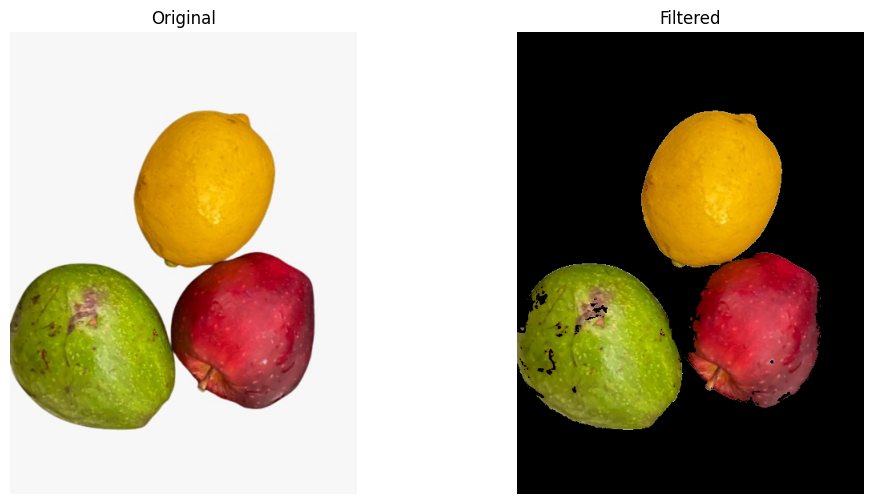

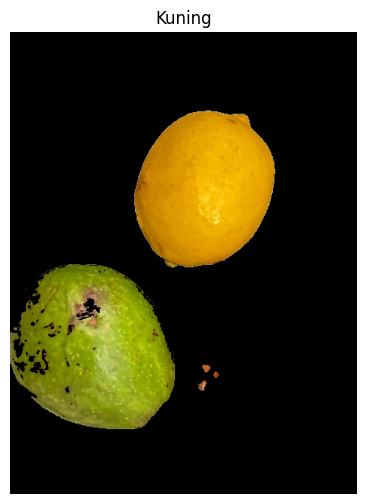

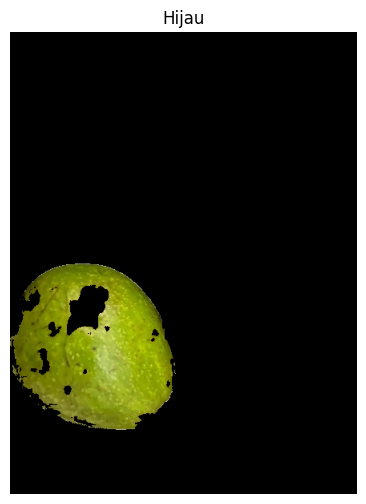

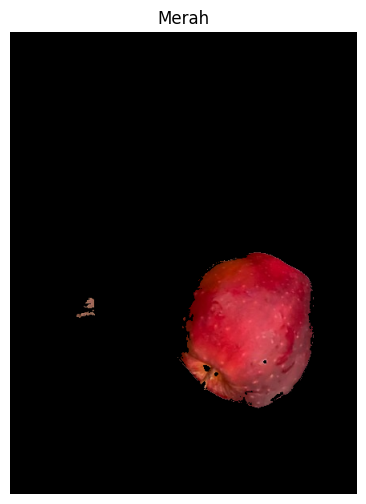

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def filter_fruit_by_color(image, lower_color, upper_color):
    # Konversi gambar ke mode HSV
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Buat mask berdasarkan rentang warna yang ditentukan
    mask = cv2.inRange(hsv_image, lower_color, upper_color)

    # Terapkan mask ke gambar asli
    filtered_image = cv2.bitwise_and(image, image, mask=mask)

    return filtered_image

# Membaca gambar buah
image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/original image.jpeg')

# Konversi gambar ke mode HSV
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Menentukan rentang warna kuning, hijau, dan merah
lower_green = np.array([30, 50, 50])
upper_green = np.array([70, 255, 255])

lower_yellow = np.array([10, 100, 100])
upper_yellow = np.array([130, 255, 255])

lower_red1 = np.array([0, 100, 100])
upper_red1 = np.array([10, 255, 255])

lower_red2 = np.array([170, 100, 100])
upper_red2 = np.array([180, 255, 255])

# Membuat mask untuk buah dengan warna kuning, hijau, dan merah
mask_yellow = cv2.inRange(hsv_image, lower_yellow, upper_yellow)
mask_green = cv2.inRange(hsv_image, lower_green, upper_green)
mask_red1 = cv2.inRange(hsv_image, lower_red1, upper_red1)
mask_red2 = cv2.inRange(hsv_image, lower_red2, upper_red2)
mask_red = cv2.bitwise_or(mask_red1, mask_red2)

# Menggabungkan semua mask
combined_mask = cv2.bitwise_or(mask_yellow, cv2.bitwise_or(mask_green, mask_red))

# Menampilkan gambar asli dan hasil filter
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].imshow(cv2.cvtColor(cv2.bitwise_and(image, image, mask=combined_mask), cv2.COLOR_BGR2RGB))
ax[1].set_title('Filtered')
ax[1].axis('off')

plt.show()

# Daftar buah dan rentang warnanya
fruits = {
    'Kuning': combined_mask & mask_yellow,
    'Hijau': combined_mask & mask_green,
    'Merah': combined_mask & mask_red
}

# Perulangan untuk menampilkan buah satu per satu
for fruit, mask in fruits.items():
    # Menerapkan mask ke gambar asli
    filtered_image = cv2.bitwise_and(image, image, mask=mask)

    # Menampilkan gambar buah
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.imshow(cv2.cvtColor(filtered_image, cv2.COLOR_BGR2RGB))
    ax.set_title(fruit)
    ax.axis('off')
    plt.show()
